In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df_meta = pd.read_csv('https://raw.githubusercontent.com/MuhammadHannan246/BreastCancerAlgorithm/main/csv/meta.csv')
df_meta.head(5)

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


# **Load dicom info file**

In [ ]:
df_dicom = pd.read_csv('https://raw.githubusercontent.com/MuhammadHannan246/BreastCancerAlgorithm/main/csv/dicom_info.csv')
df_dicom.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


# **Check image types in dataset**

In [ ]:
df_dicom.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

# **Check image path in dataset**
# **Cropped images**

In [ ]:
cropped_images = df_dicom[df_dicom.SeriesDescription=='cropped images'].image_path
cropped_images.head(5)

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

# **Full mammogram images**

In [ ]:
full_mammo = df_dicom[df_dicom.SeriesDescription=='full mammogram images'].image_path
full_mammo.head(5)

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

# **ROI images**

In [ ]:
roi_img = df_dicom[df_dicom.SeriesDescription=='ROI mask images'].image_path
roi_img.head(5)

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

# **Set correct image path for image types**

In [ ]:
imdir = '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

# **Change directory path of images**

In [ ]:
cropped_images = cropped_images.replace('CBIS-DDSM/jpeg', imdir, regex=True)
full_mammo = full_mammo.replace('CBIS-DDSM/jpeg', imdir, regex=True)
roi_img = roi_img.replace('CBIS-DDSM/jpeg', imdir, regex=True)

# **View new paths**

In [ ]:
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammo.iloc[0])
print('ROI Mask Images paths:\n')
print(roi_img.iloc[0])

Cropped Images paths:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


# **Organize image paths**

In [ ]:
full_mammo_dict = dict()
cropped_images_dict = dict()
roi_img_dict = dict()

for dicom in full_mammo:
    key = dicom.split("/")[4]
    full_mammo_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[4]
    cropped_images_dict[key] = dicom
for dicom in roi_img:
    key = dicom.split("/")[4]
    roi_img[key] = dicom

# **View keys**

In [ ]:
next(iter((full_mammo_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

# **Load the mass dataset**

In [ ]:
mass_train = pd.read_csv('https://raw.githubusercontent.com/MuhammadHannan246/BreastCancerAlgorithm/main/csv/mass_case_description_train_set.csv')
mass_test = pd.read_csv('https://raw.githubusercontent.com/MuhammadHannan246/BreastCancerAlgorithm/main/csv/mass_case_description_test_set.csv')
mass_train.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


# **Fix image paths**

In [ ]:
def fix_image_path(data):
    """correct dicom paths to correct image paths"""
    for index, img in enumerate(data.values):
        img_name = img[11].split("/")[2]
        data.iloc[index,11] = full_mammo_dict[img_name]
        img_name = img[12].split("/")[2]
        data.iloc[index,12] = cropped_images_dict[img_name]

# **Apply to datasets**

In [ ]:
fix_image_path(mass_train)
fix_image_path(mass_test)

In [ ]:
mass_train.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


# **Check unique values in pathology column**

In [ ]:
mass_train.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [ ]:
mass_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [ ]:
# rename columns
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

mass_train.head(5)

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [ ]:
# check for null values
mass_train.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [ ]:
# fill in missing values using the backwards fill method
mass_train['mass_shape'] = mass_train['mass_shape'].bfill()
mass_train['mass_margins'] = mass_train['mass_margins'].bfill()

#check null values
mass_train.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [ ]:
# quantitative summary of features
mass_train.describe()

,breast_density,abnormality_id,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


In [ ]:
# view mass_test
mass_test.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [ ]:
# check datasets shape
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [ ]:
mass_test.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [ ]:
# check for column names in mass_test
print(mass_test.columns)
print('\n')
# rename columns
mass_test = mass_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

# view renamed columns
mass_test.columns

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')




Index(['patient_id', 'breast_density', 'left_or_right_breast', 'image_view',
       'abnormality_id', 'abnormality_type', 'mass_shape', 'mass_margins',
       'assessment', 'pathology', 'subtlety', 'image_file_path',
       'cropped_image_file_path', 'ROI_mask_file_path'],
      dtype='object')

In [ ]:
# fill in missing values using the backwards fill method
mass_test['mass_margins'] = mass_test['mass_margins'].bfill()

#check null values
mass_test.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

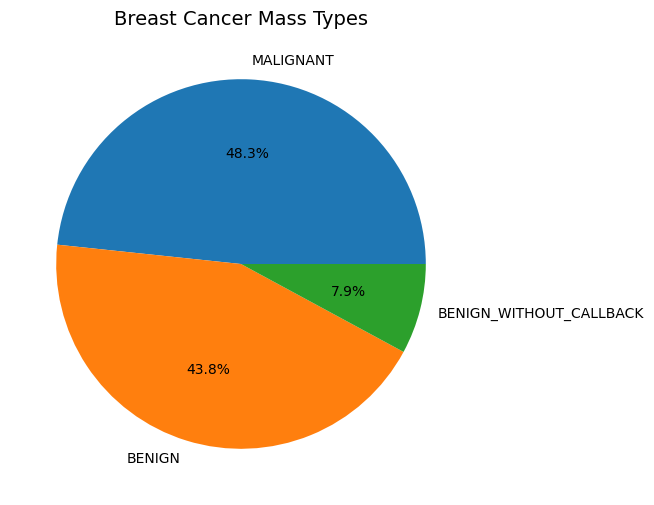

In [ ]:
# pathology distributions
value = mass_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Mass Types', fontsize=14)
plt.savefig('pathology_distributions_red.png')
plt.show()

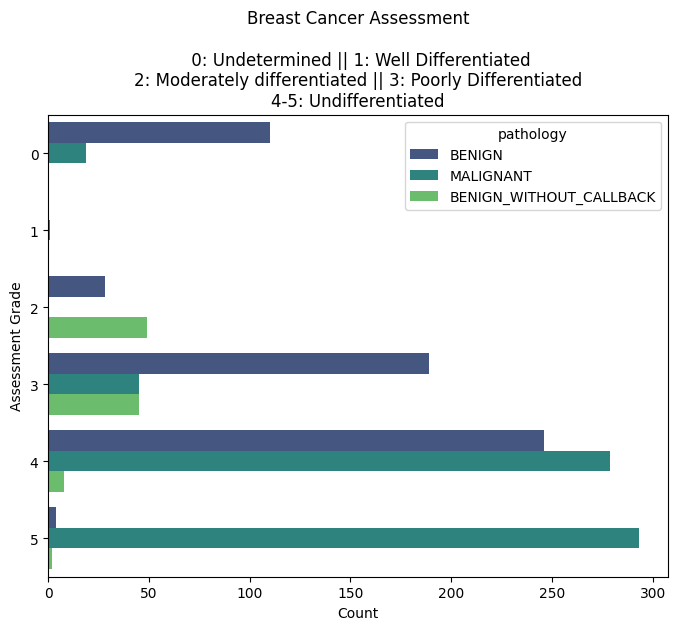

In [ ]:
# examine breast assessment types
plt.figure(figsize=(8, 6))

# Utilisez countplot pour afficher la distribution des types d'évaluation en fonction de la pathologie
sns.countplot(data=mass_train, y='assessment', hue='pathology', palette='viridis')

# Ajoutez un titre au graphique
plt.title('Breast Cancer Assessment\n\n 0: Undetermined || 1: Well Differentiated\n2: Moderately differentiated || 3: Poorly Differentiated\n4-5: Undifferentiated', fontsize=12)

# Ajoutez des étiquettes aux axes
plt.ylabel('Assessment Grade')
plt.xlabel('Count')

# Sauvegardez le graphique en tant qu'image (optionnel)
plt.savefig('breast_assessment_red.png')

# Affichez le graphique
plt.show()



<ipython-input-31-bb724c8943f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(mass_train, x='subtlety', palette='viridis')


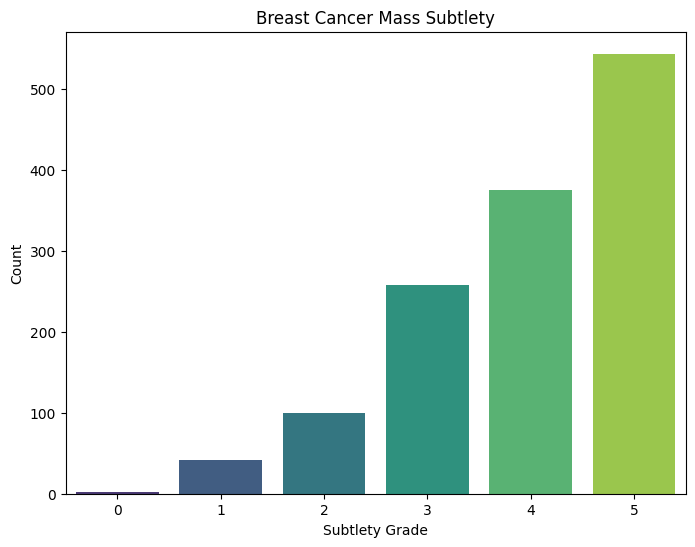

In [ ]:
# examine cancer subtlety
plt.figure(figsize=(8,6))
sns.countplot(mass_train, x='subtlety', palette='viridis')
plt.title('Breast Cancer Mass Subtlety', fontsize=12)
plt.xlabel('Subtlety Grade')
plt.ylabel('Count')
plt.savefig('cancer_subtlety_red.png')
plt.show()

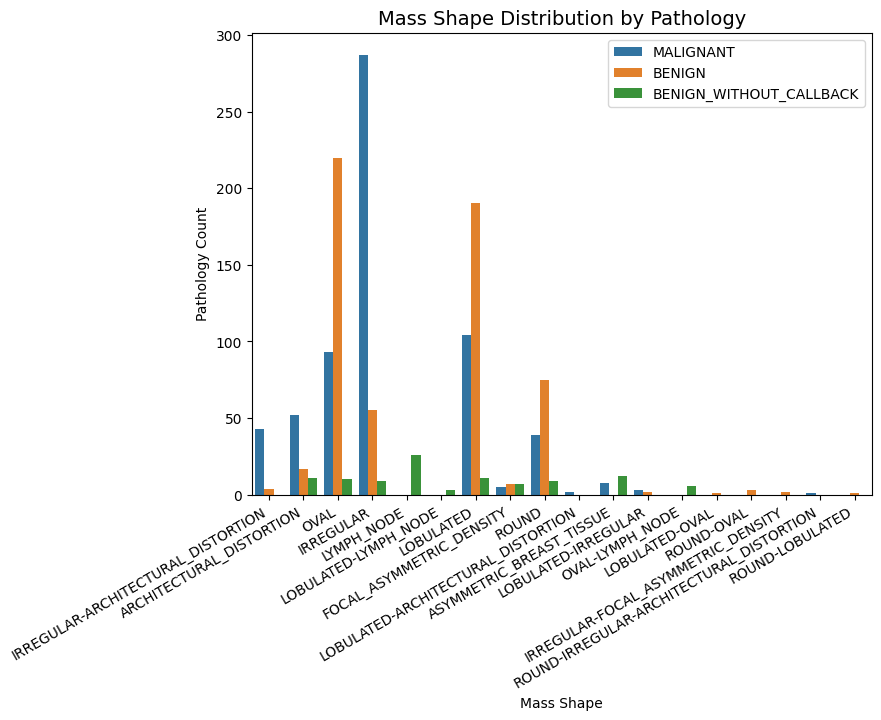

In [ ]:
# view breast mass shape distribution against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='mass_shape', hue='pathology')
plt.title('Mass Shape Distribution by Pathology', fontsize=14)
plt.xlabel('Mass Shape')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Pathology Count')
plt.legend()
plt.savefig('mass_pathology_red.png')
plt.show()

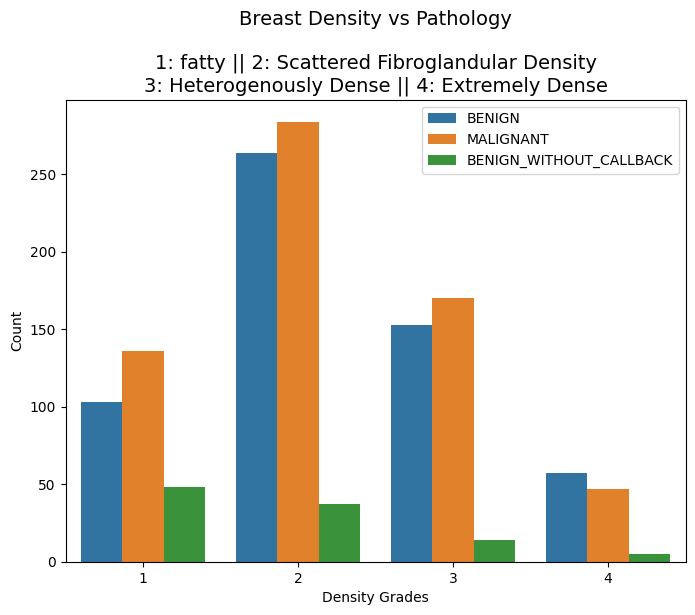

In [ ]:
# breast density against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology\n\n1: fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()
plt.savefig('density_pathology_red.png')
plt.show()

Full Mammograms:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg


FileNotFoundError: [Errno 2] No such file or directory: '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg'

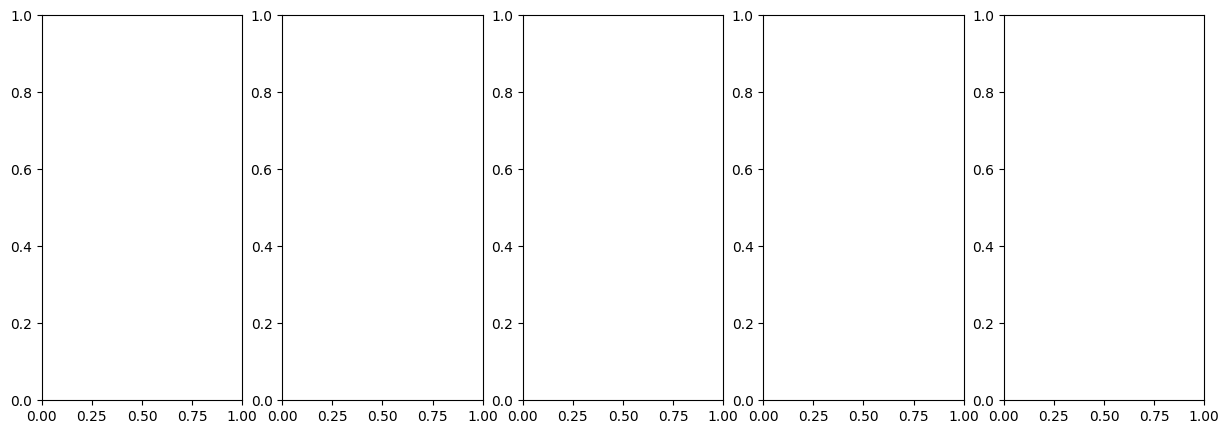

In [ ]:
# Display some images
import matplotlib.image as mpimg

# create function to display images
def display_images(column, number):
    """displays images in dataset"""
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

    # Loop through rows and display images
    for index, row in mass_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        print(image_path)
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)

In [ ]:
!ls '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/'

ls: cannot access '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/': No such file or directory


In [ ]:
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import os
def image_processor(image_path, target_size):
    """Preprocess images for CNN model"""
    absolute_image_path = os.path.abspath(image_path)
    image = cv2.imread(absolute_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    image_array = image / 255.0
    return image_array

# Merge datasets
full_mass = pd.concat([mass_train, mass_test], axis=0)
full_mass.head()
# Define the target size
target_size = (224, 224, 3)

# Apply preprocessor to train data
full_mass['processed_images'] = full_mass['image_file_path'].apply(lambda x: image_processor(x, target_size))

# Create a binary mapper
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0}

# Convert the processed_images column to an array
X_resized = np.array(full_mass['processed_images'].tolist())

# Apply class mapper to pathology column
full_mass['labels'] = full_mass['pathology'].replace(class_mapper)

# Check the number of classes
num_classes = len(full_mass['labels'].unique())

# Split data into train, test, and validation sets (70, 20, 10)
X_train, X_temp, y_train, y_temp = train_test_split(X_resized, full_mass['labels'].values, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Convert integer labels to one-hot encoded labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

In [ ]:
full_mass.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,processed_images,labels
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",1
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",1
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,"[[[0.9490196078431372, 0.9490196078431372, 0.9...",0
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,"[[[0.7450980392156863, 0.7450980392156863, 0.7...",0
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",0


 # Image Enhacement

In [ ]:
def apply_clahe(image, clip_limit=2.0, grid_size=(8, 8)):
    # Convert the image to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split the LAB image into L, A, and B channels
    l, a, b = cv2.split(lab)

    # Apply CLAHE on the L channel
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    clahe_l = clahe.apply(l)

    # Merge the CLAHE enhanced L channel with the original A and B channels
    clahe_lab = cv2.merge((clahe_l, a, b))

    # Convert the LAB image back to BGR color space
    clahe_bgr = cv2.cvtColor(clahe_lab, cv2.COLOR_LAB2BGR)

    return clahe_bgr

In [ ]:
def haze_reduced_local_global(hazy_image, window_size=15, epsilon=0.001):
    # Convert the hazy image to LAB color space
    hazy_lab = cv2.cvtColor(hazy_image, cv2.COLOR_BGR2LAB)
    hazy_l, hazy_a, hazy_b = cv2.split(hazy_lab)

    # Estimate the atmospheric light
    atmospheric_light = np.max(hazy_l)

    # Calculate the dark channel of the hazy image
    hazy_dark = cv2.erode(hazy_l, cv2.getStructuringElement(cv2.MORPH_RECT, (window_size, window_size)))

    # Estimate the transmission map
    transmission_map = 1 - hazy_dark / atmospheric_light

    # Calculate the refined transmission map
    refined_transmission_map = cv2.max(transmission_map, epsilon)

    # Calculate the inverse transmission map
    inverse_transmission_map = 1 / refined_transmission_map

    # Dehaze the image
    dehazed_l = (hazy_l.astype(np.float32) - atmospheric_light) * inverse_transmission_map + atmospheric_light

    # Clip the dehazed L channel to the valid range [0, 255]
    dehazed_l = np.clip(dehazed_l, 0, 255).astype(np.uint8)

    # Merge the dehazed L channel with the original A and B channels
    dehazed_lab = cv2.merge((dehazed_l, hazy_a, hazy_b))

    # Convert the LAB image back to BGR color space
    dehazed_bgr = cv2.cvtColor(dehazed_lab, cv2.COLOR_LAB2BGR)

    return dehazed_bgr

In [ ]:
def csid_caol(image_path, n_components, patch_size, iterations):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Extract patches from the image
    patches = cv2.extract_patches_2d(image, (patch_size, patch_size))

    # Reshape the patches for sparse coding
    patches = patches.reshape(patches.shape[0], -1)

    # Perform sparse coding using the Convolutional Analysis Operator Learning (CAOL) framework
    coder = SparseCoder(dictionary=np.random.randn(patch_size * patch_size, n_components), transform_algorithm='lasso_lars')
    codes = coder.transform(patches.T)

    # Reconstruct the image using the learned codes
    reconstructed_patches = np.dot(codes.T, coder.components_).reshape(-1, patch_size, patch_size)
    reconstructed_image = cv2.reconstruct_patches_2d(reconstructed_patches, (image.shape[0], image.shape[1]))

    return reconstructed_image.astype(np.uint8)

In [ ]:
full_mass.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,processed_images,labels
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",1
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",1
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,"[[[0.9490196078431372, 0.9490196078431372, 0.9...",0
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,"[[[0.7450980392156863, 0.7450980392156863, 0.7...",0
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",0


In [ ]:
dicom_data = pd.read_csv('../input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [ ]:
image_dir = '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg'
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
roi_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path

full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
roi_mask_images = roi_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.iloc[0]

'../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg'

In [ ]:
full_mammogram_dict = dict()
cropped_dict = dict()
roi_mask_dict = dict()

for dicom in full_mammogram_images:
    key = dicom.split("/")[4]
    full_mammogram_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[4]
    cropped_dict[key] = dicom
for dicom in roi_mask_images:
    key = dicom.split("/")[4]
    roi_mask_dict[key] = dicom
next(iter((full_mammogram_dict.items())) )

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

In [ ]:
def fix_image_path(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        dataset.iloc[i,11] = full_mammogram_dict[img_name]
        img_name = img[12].split("/")[2]
        dataset.iloc[i,12] = cropped_dict[img_name]
        img_name = img[13].split("/")[2]
        dataset.iloc[i,13] = roi_mask_dict[img_name]

# **Read the image file**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_full = mpimg.imread(full_mass.iloc[0]['image_file_path'])
img_full_cv2 = cv2.imread(full_mass.iloc[0]['image_file_path'], cv2.IMREAD_COLOR)
img_full_clahe = apply_clahe(img_full_cv2)
img_full_helg = haze_reduced_local_global(img_full_cv2)

img_crop = mpimg.imread(full_mass.iloc[0]['cropped_image_file_path'])

# **Plot the image**

# **Import necessary libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

# **Augment data**

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                  )

# **Apply augmentation to training data**

In [ ]:
train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=16)

# **CNN model**

In [ ]:
model = Sequential()

# **Add Layers**

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu',  input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten()) # flatten feature maps
model.add(Dense(512, activation='relu')) # add fully connected layers
model.add(Dense(num_classes, activation='softmax')) # output layer

# **Compile model**

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

# **Train model**

In [ ]:
history = model.fit(train_data_augmented,
                    epochs=20,
                    validation_data=(X_val, y_val),
                   )

Epoch 1/20
75/75 [==============================] - 24s 168ms/step - loss: 0.6936 - accuracy: 0.5375 - val_loss: 0.6927 - val_accuracy: 0.5179
Epoch 2/20
75/75 [==============================] - 12s 161ms/step - loss: 0.6910 - accuracy: 0.5476 - val_loss: 0.6940 - val_accuracy: 0.5179
Epoch 3/20
75/75 [==============================] - 12s 160ms/step - loss: 0.6894 - accuracy: 0.5476 - val_loss: 0.6928 - val_accuracy: 0.5179
Epoch 4/20
75/75 [==============================] - 12s 159ms/step - loss: 0.6895 - accuracy: 0.5476 - val_loss: 0.6934 - val_accuracy: 0.5179
Epoch 5/20
75/75 [==============================] - 12s 157ms/step - loss: 0.6908 - accuracy: 0.5476 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 6/20
75/75 [==============================] - 12s 158ms/step - loss: 0.6925 - accuracy: 0.5400 - val_loss: 0.6910 - val_accuracy: 0.5179
Epoch 7/20
75/75 [==============================] - 12s 159ms/step - loss: 0.6893 - accuracy: 0.5434 - val_loss: 0.6935 - val_accuracy: 0.5179

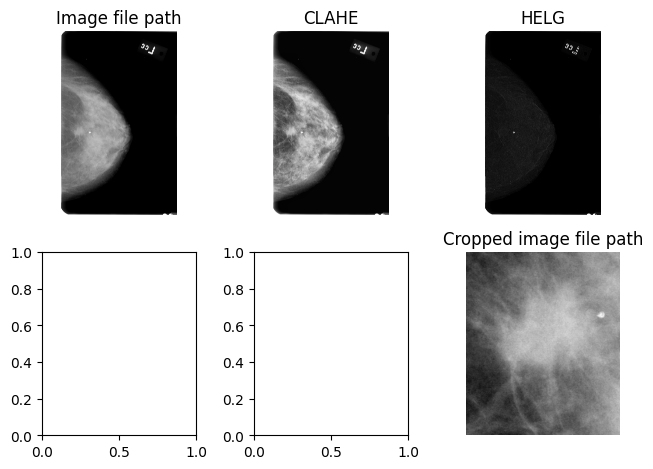

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,processed_images,labels
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",1


In [ ]:
fig, axs = plt.subplots(2, 3)
axs[0,0].imshow(img_full, cmap='gray')
axs[0,1].imshow(img_full_clahe, cmap='gray')
axs[0,2].imshow(img_full_helg, cmap='gray')

axs[1,2].imshow(img_crop, cmap='gray')

axs[0,0].axis('off')
axs[0,1].axis('off')
axs[0,2].axis('off')

axs[1,2].axis('off')

axs[0,0].set_title('Image file path')
axs[0,1].set_title('CLAHE')
axs[0,2].set_title('HELG')

axs[1,2].set_title('Cropped image file path')

plt.tight_layout()
plt.show()
full_mass.head(1)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [ ]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 1s 53ms/step - loss: 0.6644 - accuracy: 0.5660


[0.6644269824028015, 0.5659824013710022]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# create labels for confusion matrix

In [ ]:
cm_labels = ['MALIGNANT', 'BENIGN']

# Obtain predictions

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# convert predicted probabilities to class predictions

In [ ]:
y_pred_classes_test = np.argmax(y_pred_test, axis=1)
y_pred_classes_train = np.argmax(y_pred_train, axis=1)

# Assuming y_test and y_val are in binary format (0 or 1)

In [ ]:
y_true_classes_test = np.argmax(y_test, axis=1)
y_true_classes_train = np.argmax(y_train, axis=1)

# generate classification reports for test and val sets with zero_division=1

In [ ]:
test_report = classification_report(y_true_classes_test, y_pred_classes_test, target_names=cm_labels, zero_division=1)
train_report = classification_report(y_true_classes_train, y_pred_classes_train, target_names=cm_labels, zero_division=1)

# generate confusion matrices for test and validation sets

In [ ]:
test_cm = confusion_matrix(y_true_classes_test, y_pred_classes_test)
train_cm = confusion_matrix(y_true_classes_train, y_pred_classes_train)

# create function to print confusion matrix

In [ ]:
def plot_confusion_matrix(cm, labels, title):
    """plots a normalized confusion matrix as a heatmap."""
    # Calculate row sums
    row_sums = cm.sum(axis=1, keepdims=True)
    # Normalize confusion matrix
    normalized_cm = cm / row_sums

    plt.figure(figsize=(8, 6))
    sns.heatmap(normalized_cm, annot=True, fmt='.2%', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Print Train and Test reports and matrices

38/38 [==============================] - 1s 16ms/step
Train Set Classification report:
               precision    recall  f1-score   support

   MALIGNANT       0.58      0.48      0.52       650
      BENIGN       0.48      0.59      0.53       537

    accuracy                           0.53      1187
   macro avg       0.53      0.53      0.53      1187
weighted avg       0.54      0.53      0.53      1187




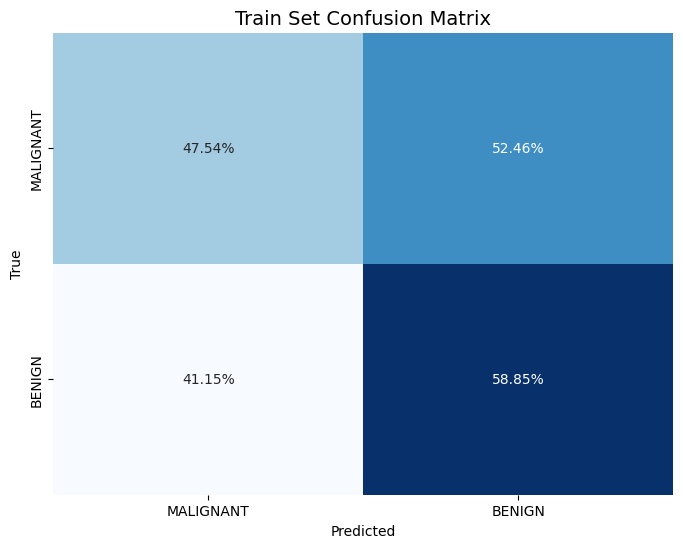

In [ ]:
print(f"Train Set Classification report:\n {train_report}\n")
plot_confusion_matrix(train_cm, cm_labels, 'Train Set Confusion Matrix')

In [ ]:
model = tf.keras.Sequential()
model.add(pretrained_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4096, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation = 'relu'))
model.add(tf.keras.layers.Dense(2, activation = 'softmax'))

learningRate = 0.0001
adam_opt = tf.keras.optimizers.Adam(learning_rate = learningRate)
model.compile(optimizer = adam_opt, loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 4096)              2101248   
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              4195328   
                                                      

In [ ]:
checkpoint_filepath = '/working/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# history = model.fit(X_train, y_train, validation_split=0.20, epochs = 30,\
#                     batch_size = 75, callbacks=[early_stopping, model_checkpoint_callback])

# history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30,\
#                     batch_size = 64, callbacks=[early_stopping, model_checkpoint_callback])

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30,\
                    batch_size = 75, callbacks=[model_checkpoint_callback])

Epoch 1/30
16/16 [==============================] - 37s 2s/step - loss: 0.7087 - accuracy: 0.5333 - val_loss: 0.6904 - val_accuracy: 0.5132
Epoch 2/30
16/16 [==============================] - 8s 537ms/step - loss: 0.6915 - accuracy: 0.5586 - val_loss: 0.6880 - val_accuracy: 0.5132
Epoch 3/30
16/16 [==============================] - 9s 586ms/step - loss: 0.6811 - accuracy: 0.5737 - val_loss: 0.6532 - val_accuracy: 0.6481
Epoch 4/30
16/16 [==============================] - 9s 557ms/step - loss: 0.6671 - accuracy: 0.6167 - val_loss: 0.6524 - val_accuracy: 0.6158
Epoch 5/30
16/16 [==============================] - 9s 553ms/step - loss: 0.6587 - accuracy: 0.6175 - val_loss: 0.6545 - val_accuracy: 0.6334
Epoch 6/30
16/16 [==============================] - 9s 544ms/step - loss: 0.6411 - accuracy: 0.6411 - val_loss: 0.6535 - val_accuracy: 0.6276
Epoch 7/30
16/16 [==============================] - 9s 538ms/step - loss: 0.5983 - accuracy: 0.6773 - val_loss: 0.7437 - val_accuracy: 0.5982
Epoch 8/

In [ ]:
 model.evaluate(X_test,y_test)

11/11 [==============================] - 10s 499ms/step - loss: 2.2923 - accuracy: 0.7214


[2.2923240661621094, 0.7214076519012451]

11/11 [==============================] - 2s 164ms/step


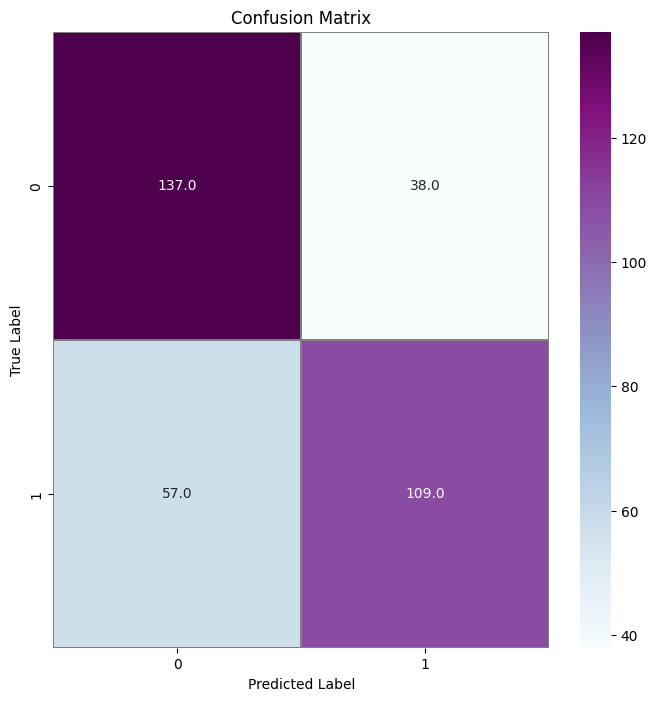

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import random

# reverse class mapping
reverse_mapper = {v:k for k, v in class_mapper.items()}

# map predictions to class_names
Y_pred_classes = np.argmax(Y_pred,axis = 1)
predicted_class_names = [reverse_mapper[i] for i in Y_pred_classes]

ground_truth_class_indices = np.argmax(y_test, axis=1)
ground_truth_class_names = [reverse_mapper[i] for i in ground_truth_class_indices]

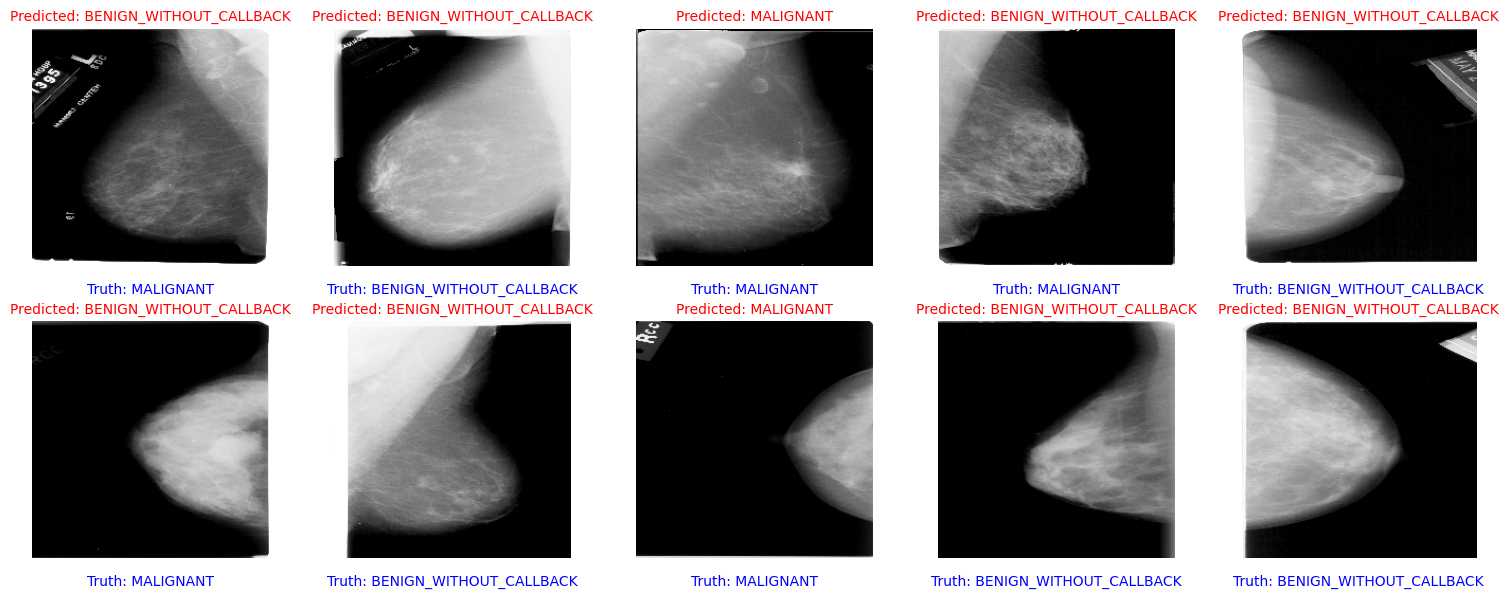

In [ ]:
import random

# Display predicted class_names
num_image_visualize = min(10, len(X_test))  # Augmented the number of images to display

# Create random indices to select images
random_indices = random.sample(range(len(X_test)), num_image_visualize)

# Create subplots for images
fig, ax = plt.subplots(2, 5, figsize=(15, 6))  # 2 lignes, 5 colonnes

for i, idx in enumerate(random_indices):
    row = i // 5  # Ligne
    col = i % 5   # Colonne

    ax[row, col].imshow(X_test[idx])
    ax[row, col].set_title(f'Predicted: {predicted_class_names[idx]}', fontsize=10, color='red')
    ax[row, col].text(0.5, -0.1, f'Truth: {ground_truth_class_names[idx]}', fontsize=10, ha='center', va='center',
                      transform=ax[row, col].transAxes, color='blue')
    ax[row, col].axis('off')

plt.tight_layout()
plt.show()
